### Distinction Task 12: MDP and RL Algorithms


### Tic-Tac-Toe (DIP & OCP) & Minimax Algorithm
##### Using following Reference to create Open-Closed Principles (OCP) and Dependency Inversion Principles (DIP)
- https://docs.python.org/3/library/abc.html
- https://towardsdatascience.com/how-to-use-abstract-classes-in-python-d4d2ddc02e90

##Dependency Inversion Principles (DIP)
#####*‘A dependency exists when a change in some element of software may cause changes in another element of software’ [1].*

-       Reduce dependencies & make them explicit & identify each.
-       The program is dependent on abstract classes not on concrete classes.
-       High level modules not dependent on low level modules, additionally details only in low level modules depend on the abstraction.
-       Your dependencies point upwards (abstraction)


##Open-Closed Principle (OCP)
-       Classes open for extension but closed for modifiable.
-        ‘hinge points in a design’ [1], OCD with LSP = DIP.
-       ‘…we want to be able to change what the modules do, without changing the source code of the modules’ [2].

##Liskov Substitution Principle (LSP)
* Related classes conforming to each other, if:
1. Sub-typing but no code extension (abstract class/ interfaces)
2. Code extension but no sub-typing (composition) polymorphism
-      Avoiding private variables/ operations in parent/ Super-Type class
-      Avoiding implementing new variables/ operations in child class/ Sub-Type
-      Over-ridden methods in child/ Sub-Type class accept the same input/ output values as parent/ Super-Type class.


## UML Design

##Abstract Board Definition
#### Parent/ Super-Type Class

In [ ]:
import datetime
import random

# Library for module abstract class
from abc import ABC, abstractmethod

# Define the abstract board
class AbstractBoard(ABC):
    def __init__(self, board_size): # Initialize the object's attributes
        self.board_size = board_size # Defines the size

    @abstractmethod
    def set_board(self, placement, state):
        pass

    @abstractmethod
    def get_board_state(self):
        pass

    @abstractmethod
    def get_board_size(self):
        return self.board_size

    @abstractmethod
    def insert_letter(self, letter, position):
        pass

    @abstractmethod
    def is_full(self):
        pass

    @abstractmethod
    def print_board(self):
        pass

    @abstractmethod
    def space_is_free(self):
        pass

    @abstractmethod
    def reset_board(self):
        pass

## Concrete Board Definition
#### Child/ Sub-Type Class
#### Define the method to make it concrete

In [ ]:
# Concrete class for board
class Board(AbstractBoard):
    def __init__(self, board_size):
        self.board_size = board_size
        self.board_data = {i: ' ' for i in range(1, board_size * board_size + 1)}

    def set_board(self, placement, state):
        self.board_data[placement] = state

    def get_board_state(self):
        return self.board_data

    def get_board_size(self):
        return self.board_size

    def insert_letter(self, letter, position):
        self.set_board(position, letter)

    def is_full(self):
        return all(val != ' ' for val in self.board_data.values())

    def print_board(self):
        for row in range(self.board_size):
            for col in range(self.board_size):
                position = row * self.board_size + col + 1
                print(self.board_data[position], end='')
                if col < self.board_size - 1:
                    print('|', end='')
            print()
            if row < self.board_size - 1:
                print('-' * (self.board_size * 2 - 1))

    def space_is_free(self, position):
        return self.board_data[position] == ' '

    def reset_board(self):
        self.board_data = {i: ' ' for i in range(1, self.board_size * self.board_size + 1)}

    def check_board_state(self, letter):
            size = self.board_size
            for row in range(size): # Check rows
                if all(self.board_data[row * size + col + 1] == letter for col in range(size)):
                    return letter

            for col in range(size): # Check columns
                if all(self.board_data[row * size + col + 1] == letter for row in range(size)):
                    return letter

            if all(self.board_data[i * size + i + 1] == letter for i in range(size)): # Check diagonals
                return letter

            if all(self.board_data[i * size + size - i] == letter for i in range(size)):
                return letter

            if all(val != ' ' for val in self.board_data.values()): # Check for draw
                return 'D'

            return None

##Abstract Game Definition
#### Parent/ Super-Type Class

In [ ]:
class AbstractGame():
  def __init__(self, board_data):
    self.board_data = board_data # Defines the board

    @abstractmethod
    def chk_for_win(self):
        pass

    @abstractmethod
    def chk_for_draw(self):
        pass

## Concrete Game Definition
#### Child/ Sub-Type Class

In [ ]:
class Game(AbstractGame):
  def __init__(self, board_data):
    # Get access to method of parent/ super type class (board) returning a temp object
    super().__init__(board_data)

  # Check for Win
  def chk_for_win(self, letter):
    board_state = self.board_data.get_board_state()
    size = self.board_data.get_board_size()
    for row in range(size): # Check rows
        if all(board_state[row * size + col + 1] == letter for col in range(size)):
            return True

    for col in range(size): # Check columns
        if all(board_state[row * size + col + 1] == letter for row in range(size)):
            return True

    if all(board_state[i * size + i + 1] == letter for i in range(size)): # Check diagonals
        return True

    if all(board_state[i * size + size - i] == letter for i in range(size)):
        return True
    return False

  # Check for Draw
  def chk_for_draw(self):
    board_state = self.board_data.get_board_state()
    for key, value in board_state.items(): # Calling tuple unpack to access keys/ values
        if value == ' ':
            return False
    return True

##Abstract Player Definition
#### Parent/ Super-Type Class
#### All details (functions) are in lower module (OCP)

In [ ]:
class AbstractPlayer(ABC):
    def __init__(self, letter, algorithm):
        self.letter = letter # O for human/bot, X for bot
        self.algorithm = algorithm # subclass of abstract algorithm

    @abstractmethod
    def get_move(self, board):
        pass

## Concrete Player Definition (human)
#### Child/ Sub-Type Class

In [ ]:
class HumanPlayer(AbstractPlayer):
    def __init__(self, letter, algorithm):
        super().__init__(letter, algorithm)

    def get_move(self, board):
        while True:
            try:
                position = int(input(f'Enter position for {self.letter}: '))
                if 1 <= position <= len(board) and board[position] == ' ':
                    return position
                else:
                    print('Invalid position, please enter a different position.')
            except ValueError:
                print('Invalid input. Please enter a valid integer.')



## Concrete Player Definition (bot)
#### Child/ Sub-Type Class

In [ ]:
class BotPlayer(AbstractPlayer):
    def __init__(self, letter, algorithm):
        super().__init__(letter, algorithm)
        self.algorithm = algorithm

    def get_move(self, board):
        print("Bot moves")
        placement = self.algorithm.comp_move(board.get_board_state(), self.letter)
        board.insert_letter(self.letter, placement)


##Abstract Algorithm Definition
#### Parent/ Super-Type Class

In [ ]:
class Algorithm(ABC):
  def __init__(self, board_data):
    self.board_data = board_data
    self.player = 'O'
    self.bot = 'X'

    @abstractmethod
    def comp_move(self, board_data, letter):
      pass

# Code a solution to solve minimimax() algorithm performance using Alpha Beta Prunning

## Concrete Algorithm Definition
#### Child/ Sub-Type Class
### Minimax() Algorithm




The tic-tac-toe game minimax algorithm produced in Modules 1-3.
- A recursive algorithm what finds the optimal move in game.
- Explores all possible moves in the game and assigning a score to each moved based on the predicted outcome.
- Assumes that both players are playing optimally.
- Class implements algorithm (abstract base class).

I extended the minimax algorithm to find the best score by ‘alpha-beta pruning’ instead of memorisation like I did in Module 2 and 3.
- Reduces the number of best potential moves (nodes) that need to be explored in the game.
- Finds best score bot can achieve, updating both based on scores found.
- Keeps track of alpha and beta,
  - When a position/ node found whose score is less than alpha (if it is maximising node) or > beta (minimising node) the algorithm can prune the rest of the subtree as values will not impact final score.
- Additionally, I added in a function called get_move which sets a time limit of 5 seconds with a max search depth of 3 moves. This was due to the algorithm crashing google collab and using up all the available free RAM. This can be increased however this appeared to be suitable to this problem.


In [ ]:
import datetime
class Minimax(Algorithm):
    def __init__(self, board_data):
        super().__init__(board_data)
        player = 'O'
        bot = 'X'

    # Find the best move for the board state and letter, recusrively explore the game/ board state
    # Consider all moves and outcomes but use depth limit to prevent infinite recursion and alpha-beta pruning to improve speed
    def minimax(self, board_state, depth, maximizing_player, letter, alpha, beta, endTime):
        if datetime.datetime.now() > endTime:
            self.mTimePassed = True
            return 0

        result = self.board_data.check_board_state(letter)
        if result == letter:
            return 100 if maximizing_player else -100
        elif result == 'D':
            return 0

        if depth == 0:
            return 0

        if maximizing_player:
            max_eval = -10000000
            for key in board_state.keys():
                if self.board_data.space_is_free(key):
                    self.board_data.insert_letter(letter, key)
                    eval = self.minimax(self.board_data.get_board_state(), depth - 1, False, letter, alpha, beta, endTime)
                    self.board_data.set_board(key, ' ')
                    max_eval = max(max_eval, eval)
                    alpha = max(alpha, eval)
                    if beta <= alpha:
                        break
            return max_eval

        else:
            min_eval = 10000000
            for key in board_state.keys():
                if self.board_data.space_is_free(key):
                    self.board_data.insert_letter(self.opposite_letter(letter), key)
                    eval = self.minimax(self.board_data.get_board_state(), depth - 1, True, letter, alpha, beta, endTime)
                    self.board_data.set_board(key, ' ')
                    min_eval = min(min_eval, eval)
                    beta = min(beta, eval)
                    if beta <= alpha:
                        break
            return min_eval

    def opposite_letter(self, letter):
        if letter == 'X':
            return 'O'
        else:
            return 'X'

    # Function calls minimax method for each move and returns highest score
    # Uses python datetime module to stop algorithm computation at 5 seconds
    def get_move(self, board_state, letter):
        self.mTimePassed = False
        endTime = datetime.datetime.now() + datetime.timedelta(0, 5) # Set time limit to 5 seconds to avoid crashing collab
        best_score = -10000000
        best_move = None
        # Board data is the current state of the game board to check available moves
        for key in board_state.keys():
            if self.board_data.space_is_free(key):
                self.board_data.insert_letter(letter, key)
                score = self.minimax(self.board_data.get_board_state(), 3, False, letter, -10000000, 10000000, endTime) # Set maximum search depth to 3 moves
                self.board_data.set_board(key, ' ')
                if score > best_score:
                    best_score = score
                    best_move = key
                if score == 100:
                    break
        return best_move

    # Calls the get_move function to generate a move for the bot
    def comp_move(self, board_state, letter):
        return self.get_move(board_state, letter)

### Minimax() Algorithm Testing
- Text 5x5

In [28]:
def main():
    while True:
        # Game Set up
        board_size = int(input('Enter board size (3, 5, or 9): '))
        board = Board(board_size)
        game_play = Game(board)
        print_board = board.print_board

        algorithm = None # Initialize algorithm

        while True: # Loop until algorithm selected
          # Player selects algorithm
          algorithm_choice = input("Select Algorithm for the game ('1' or 'random'): ")

          if algorithm_choice == '1':
            algorithm = Minimax(board_data = board)
            bot = BotPlayer('X', algorithm)
            break # Exit menu loop

          else:
            print("Currently only minimax algorithm is installed")

        # Bots first move
        bot_move = bot.get_move(board)
        board.insert_letter('X', bot_move)

        # Print board
        board.print_board()

        player = HumanPlayer('O', None)

        while not game_play.chk_for_win('O') and not game_play.chk_for_win('X') and not game_play.chk_for_draw():
            player_move = player.get_move(board.get_board_state())  # Get move from the human player
            board.insert_letter('O', player_move)

            if game_play.chk_for_win('O') or game_play.chk_for_draw():
                break

            bot_move = bot.get_move(board)
            board.insert_letter('X', bot_move)
            board.print_board()

        if game_play.chk_for_win('O'):
            print('You win!')
        elif game_play.chk_for_win('X'):
            print('Bot wins!')
        else:
            print('Draw!')

        # Print final board
        board.print_board()
        play_again = input('Do you want to play again? (y/n): ').lower()
        if play_again != 'y':
            break
main()

Enter board size (3, 5, or 9): 5
Select Algorithm for the game ('1' or 'random'): 1
Bot moves
X| | | | 
---------
 | | | | 
---------
 | | | | 
---------
 | | | | 
---------
 | | | | 
Enter position for O: 2
Bot moves
X|O|X| | 
---------
 | | | | 
---------
 | | | | 
---------
 | | | | 
---------
 | | | | 
Enter position for O: 10
Bot moves
X|O|X|X| 
---------
 | | | |O
---------
 | | | | 
---------
 | | | | 
---------
 | | | | 
Enter position for O: 20
Bot moves
X|O|X|X|X
---------
 | | | |O
---------
 | | | | 
---------
 | | | |O
---------
 | | | | 
Enter position for O: 30
Invalid position, please enter a different position.
Enter position for O: 6
Bot moves
X|O|X|X|X
---------
O|X| | |O
---------
 | | | | 
---------
 | | | |O
---------
 | | | | 
Enter position for O: 7
Invalid position, please enter a different position.
Enter position for O: 8
Bot moves
X|O|X|X|X
---------
O|X|O|X|O
---------
 | | | | 
---------
 | | | |O
---------
 | | | | 
Enter position for O: 11
Bot moves
X|O|

### What are the limitations of minimax() algorithm?
- There are branching factors in minimax() which makes the process slower than other algorithms [4]
- Searching all possible nodes/ branches hinder performance
- There are many decisions to make for this algorithm and it’s not possible to explore the entire problem/ tree.
- The algorithm assumes the human (player) is making ‘most optimal moves’ but if they use suboptimal moves the algorithm can take longer to determine the next move.
- This algorithm uses quiet a lot of memory, if both players are performing at peak, the complexity of the algorithm is O(bm), b is the branching factor and m is the maximum depth of tree (due to DFS).
Note: I enhanced this minimax() algorithm using Alpha-Beta pruning as the larger game tree (5x5) requested by the task sheet required it due to standard minimax() limitations.


# Formulate the problem as an MDP, that means, you will have a graph representing each board as a state.

States = all possible board configurations
Actions = being the moves that the player can make
Rewards = +1 for win, -1 for loss, 0 for draw.
Transition probabilities – determined by outcomes of player moves

To create a graph for MDP,
- Nodes would represent all possible board configuration
- Transitions between nodes would show the probabilities between states
- Each node would represent actions (moves players can play)
- This would get very large fast depending on the board size.

**Example** a board 3x3 size the graph would have 9 nodes representing possible board (state) configurations. Each node would have 9 outgoing edges/ moves available. The transition probabilities between nodes would be determined by the outcome of the moves.

The best way I can think of doing this is to create a class MDP and methods to create the graph, optimal policy and evaluate to find the policy. The policy could be found with RL to iterate over the graph finding the best action to take at each state, that would determine the expected reward.



# Code a solution to solve an MDP using Monte-Carlo RL algorithm (make sure you explore start).
### MDP Algorithm


### This algorithm (Monte Carlo RL) is an off-policy method, it learns from the optimal policy instead of the current policy. <br>

####I created MonteCarloRL() class which inherits form the algorithm class, however during my implementation I learnt this algorithm learns from multiple games, not just the single game. And it needs lots of games to learn an effective strategy for the reward. I did implement a test against itself before playing with player to optimise the result.
- I used reinforcement learning to learn the optimal move policy for the game. It uses state state-action value function Q and a visit count for each state-action pair (n)
- Uses an exploration vs exploitation (epsilon) and a discount factor (gamma) to discount future rewards.

**comp_move** method uses an epsilon greedy exploration to select a move, and selects the best move based on the state-action values or selects a random move with probability (epsilon).

**updated_Q() method** is used to simulate the main game and returns an episode of tuples (state, action, rewards) pairs. The reward function calculates the reward given the game result. <br>
<br>

**run_episode()** method tests 1000 episodes to find/ learn the most optimal policy (move) and then selects the best one based on the learned state-action values. <br>
<br>

**State:** The current state of the game board. For Tic Tac Toe, this is represented as a dictionary of the form {position: symbol}, where position is a tuple of x and y coordinates and symbol is the player's symbol ('X' or 'O') or an empty space (' ').<br>
<br>

**Action:** A possible move that a player can make. For Tic Tac Toe, this is represented as a tuple of x and y coordinates.<br>
<br>

**State-action pair:** A combination of a state and an action. This represents a particular situation where a player is in a certain state and makes a certain move.<br>
<br>

**State-action value function (Q):** A function that assigns a numerical value to each state-action pair. This value represents the expected future reward of taking that action in that state. The goal of reinforcement learning is to learn the optimal state-action value function that maximizes the expected future reward.<br>
<br>

**Visit count (N):** The number of times a particular state-action pair has been visited.<br>
<br>

**Episode:** A sequence of state-action pairs and rewards that occur during a simulated game or interaction with the environment.<br>
<br>

**Reward:** Value that reflects how good or bad a particular state is. In Tic Tac Toe, the reward is usually 1 for a win, -1 for a loss, and 0 for a draw.<br>
<br>

**Discount factor (gamma):** A factor that determines how much to discount future rewards.
1. A value of 1 means the future rewards are not discounted at all
2.And a value less than 1 means that future rewards are discounted to some extent.

In [29]:
class MonteCarloRL(Algorithm):
    def __init__(self, epsilon=0.1, gamma=1.0):
        super().__init__(board_data=None)
        self.epsilon = epsilon # Exploration vs Exploitation
        self.gamma = gamma # Discount factor
        self.Q = {} # State-action value function
        self.N = {} # Visit count for each state-action pair

    # Method uses an epsilon greedy exploration to select a move
    # Selects the best move based on the state-action values or selects a random move with probability (epsilon).
    def comp_move(self, board_state, letter):
        valid_moves = [k for k, v in board_state.items() if v == ' '] # Get all valid moves
        if random.uniform(0, 1) < self.epsilon: # Exploration
            return random.choice(valid_moves)
        else: # Exploitation
            values = [self.Q.get((tuple(board_state.items()), move), 0) for move in valid_moves] # Get state-action values
            max_value = max(values)
            if values.count(max_value) > 1:
                best_moves = [valid_moves[i] for i in range(len(valid_moves)) if values[i] == max_value]
                return random.choice(best_moves)
            else:
                return valid_moves[values.index(max_value)]

    # Method is used to simulate the main game and returns an episode of tuples (state, action, rewards) pairs.
    # The reward function calculates the reward given the game result.
    def update_Q(self, episode):
        G = 0 # Total return
        for i, (state, action, reward) in enumerate(episode[::-1]): # Traverse episode backwards
            G = self.gamma * G + reward # Calculate discounted return
            N_key = (state, action) # State-action pair for visit count/ dictionary
            self.N[N_key] = self.N.get(N_key, 0) + 1 # Increment visit count
            Q_key = (state, action) # State-action pair for state-action value dictionary
            alpha = 1 / self.N[N_key] # Step size
            self.Q[Q_key] = self.Q.get(Q_key, 0) + alpha * (G - self.Q.get(Q_key, 0)) # Update state-action value function

    # The run_episode() method tests 1000 episodes to find/ learn the most optimal policy (move) and then selects the best one based on the learned state-action values.
    def run_episode(self, board, letter):
        episode = []
        while True:
            state = tuple(board.get_board_state().items())
            action = self.comp_move(board.get_board_state(), letter)
            reward = self.reward_function(board.check_board_state(letter))
            episode.append((state, action, reward))
            if board.check_board_state(letter) is not None:
                break
            board.insert_letter(letter, action)
            letter = 'O' if letter == 'X' else 'X' # Switch players
        return episode

    # Takes in the result, outcome of game
    # This allows the algorithm to maximise the rewards/ learn most optimal strategy
    def reward_function(self, result):
        if result == 'O': # Human wins
            return -1
        elif result == 'X': # Bot wins
            return 1
        else:
            return 0 # Tie


    # Algorithm to find the best move for the current game board state.
    # run_episode() method 1000 times, this plays a number of gamest against a copy of itself
    # Updates the Q values used to make move decisions. Finds valid moves form the board_state
    # Selects the highest state-action value, if there are multiple moves with high values it will choose randomly.
    def get_move(self, board_state, letter):
        for i in range(1000): # Run 1000 episodes
            board = Board(board_size=3) # Initialize empty board
            self.run_episode(board, letter)
        valid_moves = [k for k, v in board_state.items() if v == ' '] # Get all valid moves
        values = [self.Q.get((tuple(board_state.items()), move), 0) for move in valid_moves] # Get state-action values
        max_value = max(values)
        if values.count(max_value) > 1:
            best_moves = [valid_moves[i] for i in range(len(valid_moves)) if values[i] == max_value]
            return random.choice(best_moves)
        else:
            return valid_moves[values.index(max_value)]

# Main function to test algorithm
def main():
    while True:
        # Game Set up
        board_size = int(input('Enter board size (3, 5, or 9): '))
        board = Board(board_size)
        game_play = Game(board)
        print_board = board.print_board

        algorithm = None # Initialize algorithm

        while True: # Loop until user selects an algorithm
            # Player selects algorithm
            algorithm_choice = input("Select Algorithm for the game ('1' for Minimax, '2' for Monte-Carlo RL, or 'random' for random bot): ")
            if algorithm_choice == '1':
                algorithm = Minimax(board_data = board)
                break
            elif algorithm_choice == '2':
                algorithm = MonteCarloRL(epsilon=0.1, gamma=1.0)
                break
            elif algorithm_choice == 'random':
                break
            else:
                print("Invalid choice. Please select again.")

        # Bots first move
        if algorithm_choice != 'random':
            bot = BotPlayer('X', algorithm)
            bot_move = bot.get_move(board)
            board.insert_letter('X', bot_move)

        # Print board
        board.print_board()

        player = HumanPlayer('O', None)

        while not game_play.chk_for_win('O') and not game_play.chk_for_win('X') and not game_play.chk_for_draw():
            player_move = player.get_move(board.get_board_state())  # Get move from the human player
            board.insert_letter('O', player_move)

            if game_play.chk_for_win('O') or game_play.chk_for_draw():
                break

            if algorithm_choice == 'random':
                bot_move = random.choice([k for k, v in board.get_board_state().items() if v == ' ']) # Select random move
                board.insert_letter('X', bot_move)
            else:
                bot_move = bot.get_move(board)
                board.insert_letter('X', bot_move)

            board.print_board()

        if game_play.chk_for_win('O'):
            print('You win!')
            # Print final board
            board.print_board()
        elif game_play.chk_for_win('X'):
            print('Bot wins!')
            # Print final board
            board.print_board()
        else:
            print('Draw!')
            # Print final board
            board.print_board()

        play_again = input('Do you want to play again? (y/n): ').lower()
        if play_again != 'y':
            break
main()

Enter board size (3, 5, or 9): 3
Select Algorithm for the game ('1' for Minimax, '2' for Monte-Carlo RL, or 'random' for random bot): 2
Bot moves
 | | 
-----
 | | 
-----
 |X| 
Enter position for O: 3
Bot moves
X| |O
-----
 | | 
-----
 |X| 
Enter position for O: 5
Bot moves
X| |O
-----
 |O| 
-----
 |X|X
Enter position for O: 6
Bot moves
X|X|O
-----
 |O|O
-----
 |X|X
Enter position for O: 4
You win!
X|X|O
-----
O|O|O
-----
 |X|X
Do you want to play again? (y/n): y
Enter board size (3, 5, or 9): 3
Select Algorithm for the game ('1' for Minimax, '2' for Monte-Carlo RL, or 'random' for random bot): 2
Bot moves
 | |X
-----
 | | 
-----
 | | 
Enter position for O: 1
Bot moves
O| |X
-----
X| | 
-----
 | | 
Enter position for O: 2
Bot moves
O|O|X
-----
X| | 
-----
X| | 
Enter position for O: 3
Invalid position, please enter a different position.
Enter position for O: 6
Bot moves
O|O|X
-----
X| |O
-----
X| |X
Enter position for O: 5
Bot moves
O|O|X
-----
X|O|O
-----
X|X|X
Bot wins!
O|O|X
-----
X|

# Devise and code a solution to tic-tac-toe using temporal difference algorithm – SARSA

#### The SARSA algorithm is a type of reinforcement learning, it updates the state-acton value function based on the rewards given and runs episodes of the game.
- This is an ‘on policy method’ which learnt from the same policy that selects actions.
- It uses a temporal difference to update the state-action value at each step, whereas the previous algorithm Monte-Carlo RL updates the state value function only at the end of the episode.
- I created new classes for SARSA algorithm and Q-Learning algorithm, they use new versions of comp_move and update_Q methods for each algorithm.
- Algorithm calls the update_Q() method to update the state-action function after each bot move. <br>
<br>
- Algorithm uses values for the step size, exploration/ exploitation, and discount factor. <br>

**comp_move()** selects the next move for the bot based on the current state-action value. If the exploration stage chooses a random move or it uses current knowledge to select a move with the highest found state-action value.
- Select one of the best moves randomly to introduce stochasticity (random probability distribution). If there are multiple moves like the previous algorithm it will randomly select one. <br>
<br>

**update_Q()** updates the state- action value based on rewards (moves previously made) and uses the SARSA update rule to update the state-action pair.
<br>
<br>
**run_episode()** runs a single game and uses the bots first move, plays the game until it finishes and keeps track of the state-action pairs matching rewards during the episode. <br>
<br>
**reward_function()** maps the result of the game same as previous function. <br>
<br>
**get_move()** is similar to comp_move but is used to get the bots move when playing against another player and not in a training stage. It selects the move with the highest state-action value.


In [35]:
# SARSA Algorithm
class Sarsa(Algorithm):
    def __init__(self, alpha=0.5, epsilon=0.1, gamma=1.0):
        super().__init__(board_data=None)
        self.alpha = alpha # Step size
        self.epsilon = epsilon # Exploration vs Exploitation trade-off
        self.gamma = gamma # Discount factor
        self.Q = {} # State-action value function


    # Selects the next move for a given player using the exploration/exploitation trade-off.
    # If a random number is less than the exploration rate (epsilon), it chooses a random move (exploration).
    # Else the move with the highest value according to the state-action value function (exploitation).
    # If multiple moves have the same, highest value, it selects one of them randomly.
    def comp_move(self, board_state, letter):
        # Get all valid moves
        valid_moves = [k for k, v in board_state.items() if v == ' ']
        if not valid_moves:
            # There are no more valid moves
            return None
        # Exploration
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(valid_moves)
        else:
            # Exploitation
            values = [self.Q.get((tuple(board_state.items()), move), 0) for move in valid_moves]
            max_value = max(values)
            if values.count(max_value) > 1:
                best_moves = [valid_moves[i] for i in range(len(valid_moves)) if values[i] == max_value]
                return random.choice(best_moves)
            else:
                return valid_moves[values.index(max_value)]

    # Updates the state-action value function using temporal difference (TD) learning.
    # Finds the difference between the current state-action value and updates value for the current state and action based on reward received.
    def update_Q(self, state, action, reward, next_state, next_action):
        Q_key = (state, action) # State-action pair for state-action value dictionary
        # Get state-action values for next state
        next_state_values = [self.Q.get((next_state, a), 0) for a in range(1, 10)]
        # Select the highest value
        max_next_state_value = max(next_state_values)
        # Update the state-action value for current state and action using TD learning and given step size (alpha)
        self.Q[Q_key] = self.Q.get(Q_key, 0) + self.alpha * (reward + self.gamma * max_next_state_value - self.Q.get(Q_key, 0)) # Update state-action value function


    # Runs (episode) Sequence of (state, action, reward) tuples that capture the experience of the 2nd player
    # selects the next aciton using comp_move, enter s loop to update action
    # Computes rewards for the next step, using update_Q method
    def run_episode(self, board, letter):
        state = tuple(board.get_board_state().items())
        action = self.comp_move(board.get_board_state(), letter)
        episode = []
        while True:
            # Compute the reward for the current step
            reward = self.reward_function(board.check_board_state(letter))
            # Choose the next action using the exploration-exploitation trade-off
            next_action = self.comp_move(board.get_board_state(), letter)
            # Get the next state
            next_state = tuple(board.get_board_state().items())
            # Store the state, action, and reward for the current step in the episode list
            episode.append((state, action, reward))

            # Check if the game has ended
            if board.check_board_state(letter) is not None:
                break
            # Update the board with the chosen action
            board.insert_letter(letter, action)
            letter = 'O' if letter == 'X' else 'X' # Switch players
            # Compute the reward for the next step
            next_reward = self.reward_function(board.check_board_state(letter))
            # Update the state-action value function using TD learning
            self.update_Q(state, action, reward, next_state, next_action)
            # Set the current state, action, and reward to the next state, action, and reward for the next iteration of the loop
            state = next_state
            action = next_action
            reward = next_reward
        return episode # Return the episode (state, action, reward) tuples

    def reward_function(self, result):
        if result == 'O':
            return -1
        elif result == 'X':
            return 1
        else:
            return 0

    # Handle the exploration/exploitation trade-off.
    def get_move(self, board_state, letter):
        valid_moves = [k for k, v in board_state.items() if v == ' '] # Get all valid moves
        # Get state-action values
        values = [self.Q.get((tuple(board_state.items()), move), 0) for move in valid_moves]
        max_value = max(values)
        # Select one of the best moves randomly to introduce stochasticity
        if values.count(max_value) > 1:
            best_moves = [valid_moves[i] for i in range(len(valid_moves)) if values[i] == max_value]
            return random.choice(best_moves)
        # Choose the move with the highest value
        else:
            return valid_moves[values.index(max_value)]

def main():
    while True:
        # Game Set up
        board_size = int(input('Enter board size (3, 5, or 9): '))
        board = Board(board_size)
        game_play = Game(board)
        print_board = board.print_board

        algorithm = None # Initialize algorithm variable

        while True: # Loop until user selects an algorithm
            # Player selects algorithm
            algorithm_choice = input("Select Algorithm for the game ('1' for Minimax, '2' for Monte-Carlo RL, '3' for SARSA, or 'random' for random bot): ")
            if algorithm_choice == '1':
                algorithm = Minimax(board_data = board)
                break
            elif algorithm_choice == '2':
                algorithm = MonteCarloRL(epsilon=0.1, gamma=1.0)
                break
            elif algorithm_choice == '3':
                algorithm = Sarsa(alpha=0.5, epsilon=0.1, gamma=1.0)
                break
            elif algorithm_choice == 'random':
                break
            else:
                print("Invalid choice. Please select again.")

        # Bots first move
        if algorithm_choice != 'random':
            bot = BotPlayer('X', algorithm)
            bot_move = bot.get_move(board)
            board.insert_letter('X', bot_move)

        # Print board
        board.print_board()

        player = HumanPlayer('O', None)

        while not game_play.chk_for_win('O') and not game_play.chk_for_win('X') and not game_play.chk_for_draw():
            player_move = player.get_move(board.get_board_state())  # Get move from the human player
            board.insert_letter('O', player_move)

            if game_play.chk_for_win('O') or game_play.chk_for_draw():
                break

            if algorithm_choice == 'random':
                bot_move = random.choice([k for k, v in board.get_board_state().items() if v == ' ']) # Select random move
                board.insert_letter('X', bot_move)
            else:
                bot_move = bot.get_move(board)
                board.insert_letter('X', bot_move)

            board.print_board()

            # Updates the state-action value function for SARSA based on each bot move
            if algorithm_choice == '3':
                state = tuple(board.get_board_state().items())
                action = bot.algorithm.comp_move(board.get_board_state(), 'X')
                reward = bot.algorithm.reward_function(board.check_board_state('X'))
                next_state = tuple(board.get_board_state().items())
                next_action = bot.algorithm.comp_move(board.get_board_state(), 'O')
                bot.algorithm.update_Q(state, action, reward, next_state, next_action)


        if game_play.chk_for_win('O'):
            print('You win!')
            # Print final board
            board.print_board()
        elif game_play.chk_for_win('X'):
            print('Bot wins!')
            # Print final board
            board.print_board()
        else:
            print('Draw!')
            # Print final board
            board.print_board()

        play_again = input('Do you want to play again? (y/n): ').lower()
        if play_again != 'y':
            break

main()

Enter board size (3, 5, or 9): 3
Select Algorithm for the game ('1' for Minimax, '2' for Monte-Carlo RL, '3' for SARSA, or 'random' for random bot): 3
Bot moves
 | | 
-----
 |X| 
-----
 | | 
Enter position for O: 2
Bot moves
X|O| 
-----
 |X| 
-----
 | | 
Enter position for O: 3
Bot moves
X|O|O
-----
 |X|X
-----
 | | 
Enter position for O: 7
Bot moves
X|O|O
-----
 |X|X
-----
O| |X
Bot wins!
X|O|O
-----
 |X|X
-----
O| |X
Do you want to play again? (y/n): y
Enter board size (3, 5, or 9): 5
Select Algorithm for the game ('1' for Minimax, '2' for Monte-Carlo RL, '3' for SARSA, or 'random' for random bot): 3
Bot moves
 | | | | 
---------
 | | | | 
---------
 | | | | 
---------
 | | | |X
---------
 | | | | 
Enter position for O: 2
Bot moves
 |O| | |X
---------
 | | | | 
---------
 | | | | 
---------
 | | | |X
---------
 | | | | 
Enter position for O: 3
Bot moves
 |O|O| |X
---------
 | | |X| 
---------
 | | | | 
---------
 | | | |X
---------
 | | | | 
Enter position for O: 4
Bot moves
X|O|O|O|

# Devise and code a solution to tic-tac-toe using temporal difference algorithm Q-learning.

### QLearning algorithm is another reinforcement learning its different to SARSA in how it updates its state-action value.
- SARSA uses Temporal Difference TD but QLearning updates by maximum expected future rewards.
- It does this for each step where it takes the maximum expected future reward of the next state and all possible actions from the next state, but the next action is not used to update the algorithm.<br>
<br>

Algorithm starts with default values for the learning rate (alpha), exploration vs exploitation rate (epsilon), and discount factor (gamma). And an empty dictionary to store the state-action value function.<br>
<br>
**comp_move()** selects the next move for a given player using the exploration/exploitation.
- If a random number is less than the exploration rate (epsilon), it chooses a random move (exploration).
- Or move with the highest value according to the state-action value/ exploitation. Multiple moves highest value selects randomly.<br>
<br>

**update_Q()** updates the state-action value function/ computes the next state with the highest state-action value, based on the given discount factor (gamma)
- Updates the current state-action value function with the reward received and learning rate (alpha).<br>
<br>

**run_episode()** runs a sequence of (state, action, reward) tuples track player interaction. Gets current state and selects the next action using comp_move().
- Loops to update board based on selected action, rewards for the current/ next steps, updates the state-action value update_Q()
- Records the current (state, action, reward). <br>
<br>

**reward_function()** same as previous methods.<br>
<br>
**get_move()** selects the next move for board state/ player using state-action value. <br>
<br>
**comp_move()** and run_episode() to handle the exploration/exploitation. Returns move based on this.


In [4]:
# Uses same comp_move() and run_episode() to handle the exploration/exploitation

class QLearning(Algorithm):
    def __init__(self, alpha=0.5, epsilon=0.1, gamma=1.0):
        super().__init__(board_data=None)
        self.alpha = alpha # Step size
        self.epsilon = epsilon # Exploration vs Exploitation trade-off
        self.gamma = gamma # Discount factor
        self.Q = {} # State-action value function

    # selects the next move for a given player using the exploration/exploitation
    # If a random number is less than the exploration rate (epsilon), it chooses a random move (exploration)
    # Or move with the highest value according to the state-action value/ exploitation. Multiple moves highest value selects randomly
    def comp_move(self, board_state, letter):
        valid_moves = [k for k, v in board_state.items() if v == ' '] # Get all valid moves
        if random.uniform(0, 1) < self.epsilon: # Exploration
            return random.choice(valid_moves)
        else: # Exploitation
            values = [self.Q.get((tuple(board_state.items()), move), 0) for move in valid_moves] # Get state-action values
            max_value = max(values)
            if values.count(max_value) > 1:
                best_moves = [valid_moves[i] for i in range(len(valid_moves)) if values[i] == max_value]
                return random.choice(best_moves)
            else:
                return valid_moves[values.index(max_value)]

    # Updates the state-action value function/ computes the next state with the highest state-action value, based on the given discount factor (gamma)
    # Updates the current state-action value function with the reward received and learning rate (alpha)
    def update_Q(self, state, action, reward, next_state):
        Q_key = (state, action) # State-action pair for state-action value dictionary
        next_state_values = [self.Q.get((next_state, a), 0) for a in range(1, 10)]
        max_next_state_value = max(next_state_values)
        self.Q[Q_key] = self.Q.get(Q_key, 0) + self.alpha * (reward + self.gamma * max_next_state_value - self.Q.get(Q_key, 0)) # Update state-action value function


    # Runs a sequence of (state, action, reward) tuples track player interaction
    # Gets current state and selects the next action using comp_move()
    # Loops tp update board based on selected action, rewards for the current/ next steps
    # Updates the state-action value update_Q() and records the current (state, action, reward)
    def run_episode(self, board, letter):
        state = tuple(board.get_board_state().items())
        episode = []
        while True:
            action = self.comp_move(board.get_board_state(), letter)
            reward = self.reward_function(board.check_board_state(letter))
            board.insert_letter(letter, action)
            next_state = tuple(board.get_board_state().items())
            episode.append((state, action, reward))
            if board.check_board_state(letter) is not None:
                break
            letter = 'O' if letter == 'X' else 'X' # Switch players
            self.update_Q(state, action, reward, next_state)
            state = next_state
        return episode

    # Same as previous methods
    def reward_function(self, result):
        if result == 'O':
            return -1
        elif result == 'X':
            return 1
        else:
            return 0

    # Selects the next move for board state/ player using state-action value
    def get_move(self, board_state, letter):
        valid_moves = [k for k, v in board_state.items() if v == ' '] # Get all valid moves
        values = [self.Q.get((tuple(board_state.items()), move), 0) for move in valid_moves] # Get state-action values
        max_value = max(values)
        if values.count(max_value) > 1:
            best_moves = [valid_moves[i] for i in range(len(valid_moves)) if values[i] == max_value]
            return random.choice(best_moves)
        else:
            return valid_moves[values.index(max_value)]


def main():
    while True:
        # Game Set up
        board_size = int(input('Enter board size (3, 5, or 9): '))
        board = Board(board_size)
        game_play = Game(board)
        print_board = board.print_board

        algorithm = None # Initialize algorithm

        while True: # Loop until user selects an algorithm
            # Player selects algorithm
            algorithm_choice = input("Select Algorithm for the game ('1' for Minimax, '2' for Monte-Carlo RL, '3' for SARSA, '4' for Q-learning, or 'random' for random bot): ")
            if algorithm_choice == '1':
                algorithm = Minimax(board_data = board)
                break
            elif algorithm_choice == '2':
                algorithm = MonteCarloRL(epsilon=0.1, gamma=1.0)
                break
            elif algorithm_choice == '3':
                algorithm = Sarsa(alpha=0.5, epsilon=0.1, gamma=1.0)
                break
            elif algorithm_choice == '4':
                algorithm = QLearning(alpha=0.5, epsilon=0.1, gamma=1.0)
                break
            elif algorithm_choice == 'random':
                break
            else:
                print("Invalid choice. Please select again.")

        # Bots first move
        if algorithm_choice != 'random':
            bot = BotPlayer('X', algorithm)
            bot_move = bot.get_move(board)
            board.insert_letter('X', bot_move)

        # Print board
        board.print_board()

        player = HumanPlayer('O', None)

        while not game_play.chk_for_win('O') and not game_play.chk_for_win('X') and not game_play.chk_for_draw():
            player_move = player.get_move(board.get_board_state())  # Get move from the human player
            board.insert_letter('O', player_move)

            if game_play.chk_for_win('O') or game_play.chk_for_draw():
                break

            if algorithm_choice == 'random':
                bot_move = random.choice([k for k, v in board.get_board_state().items() if v == ' ']) # Select random move
                board.insert_letter('X', bot_move)
            else:
                bot_move = bot.get_move(board)
                board.insert_letter('X', bot_move)

            board.print_board()

            if algorithm_choice == '4':
                state = tuple(board.get_board_state().items())
                action = bot.algorithm.comp_move(board.get_board_state(), 'X')
                reward = bot.algorithm.reward_function(board.check_board_state('X'))
                next_state = tuple(board.get_board_state().items())
                bot.algorithm.update_Q(state, action, reward, next_state)

        if game_play.chk_for_win('O'):
            print('You win!')
            # Print final board
            board.print_board()
        elif game_play.chk_for_win('X'):
            print('Bot wins!')
            # Print final board
            board.print_board()
        else:
            print('Draw!')
            # Print final board
            board.print_board()

        play_again = input('Do you want to play again? (y/n): ').lower()
        if play_again != 'y':
            break

main()

Enter board size (3, 5, or 9): 3
Select Algorithm for the game ('1' for Minimax, '2' for Monte-Carlo RL, '3' for SARSA, '4' for Q-learning, or 'random' for random bot): 4
Bot moves
 | | 
-----
 | |X
-----
 | | 
Enter position for O: 1
Bot moves
O| | 
-----
 | |X
-----
X| | 
Enter position for O: 2
Bot moves
O|O| 
-----
X| |X
-----
X| | 
Enter position for O: 7
Invalid position, please enter a different position.
Enter position for O: 6
Invalid position, please enter a different position.
Enter position for O: 5
Bot moves
O|O| 
-----
X|O|X
-----
X| |X
Enter position for O: 3
You win!
O|O|O
-----
X|O|X
-----
X| |X
Do you want to play again? (y/n): n


# Test the working of your Q-Learning algorithm on Tic-tac-toe on board with size 5x5.


In [6]:
def main():
    while True:
        # Game Set up
        board_size = int(input('Enter board size (3, 5, or 9): '))
        board = Board(board_size)
        game_play = Game(board)
        print_board = board.print_board

        algorithm = None # Initialize algorithm

        while True: # Loop until user selects an algorithm
            # Player selects algorithm
            algorithm_choice = input("Select Algorithm for the game ('1' for Minimax, '2' for Monte-Carlo RL, '3' for SARSA, '4' for Q-learning, or 'random' for random bot): ")
            if algorithm_choice == '1':
                algorithm = Minimax(board_data = board)
                break
            elif algorithm_choice == '2':
                algorithm = MonteCarloRL(epsilon=0.1, gamma=1.0)
                break
            elif algorithm_choice == '3':
                algorithm = Sarsa(alpha=0.5, epsilon=0.1, gamma=1.0)
                break
            elif algorithm_choice == '4':
                algorithm = QLearning(alpha=0.5, epsilon=0.1, gamma=1.0)
                break
            elif algorithm_choice == 'random':
                break
            else:
                print("Invalid choice. Please select again.")

        # Bots first move
        if algorithm_choice != 'random':
            bot = BotPlayer('X', algorithm)
            bot_move = bot.get_move(board)
            board.insert_letter('X', bot_move)

        # Print board
        board.print_board()

        player = HumanPlayer('O', None)

        while not game_play.chk_for_win('O') and not game_play.chk_for_win('X') and not game_play.chk_for_draw():
            player_move = player.get_move(board.get_board_state())  # Get move from the human player
            board.insert_letter('O', player_move)

            if game_play.chk_for_win('O') or game_play.chk_for_draw():
                break

            if algorithm_choice == 'random':
                bot_move = random.choice([k for k, v in board.get_board_state().items() if v == ' ']) # Select random move
                board.insert_letter('X', bot_move)
            else:
                bot_move = bot.get_move(board)
                board.insert_letter('X', bot_move)

            board.print_board()

            if algorithm_choice == '4':
                state = tuple(board.get_board_state().items())
                action = bot.algorithm.comp_move(board.get_board_state(), 'X')
                reward = bot.algorithm.reward_function(board.check_board_state('X'))
                next_state = tuple(board.get_board_state().items())
                bot.algorithm.update_Q(state, action, reward, next_state)

        if game_play.chk_for_win('O'):
            print('You win!')
            # Print final board
            board.print_board()
        elif game_play.chk_for_win('X'):
            print('Bot wins!')
            # Print final board
            board.print_board()
        else:
            print('Draw!')
            # Print final board
            board.print_board()

        play_again = input('Do you want to play again? (y/n): ').lower()
        if play_again != 'y':
            break

main()

Enter board size (3, 5, or 9): 5
Select Algorithm for the game ('1' for Minimax, '2' for Monte-Carlo RL, '3' for SARSA, '4' for Q-learning, or 'random' for random bot): 4
Bot moves
 | | | | 
---------
 | |X| | 
---------
 | | | | 
---------
 | | | | 
---------
 | | | | 
Enter position for O: 1
Bot moves
O| | | | 
---------
 | |X| | 
---------
 | | | | 
---------
 | | | | 
---------
 |X| | | 
Enter position for O: 5
Bot moves
O| | | |O
---------
 | |X| | 
---------
 | | | | 
---------
X| | | | 
---------
 |X| | | 
Enter position for O: 15
Bot moves
O| | | |O
---------
 | |X| | 
---------
 | | | |O
---------
X| | | | 
---------
 |X|X| | 
Enter position for O: 6
Bot moves
O| | | |O
---------
O| |X| | 
---------
 | | | |O
---------
X|X| | | 
---------
 |X|X| | 
Enter position for O: 7
Bot moves
O| | | |O
---------
O|O|X| | 
---------
X| | | |O
---------
X|X| | | 
---------
 |X|X| | 
Enter position for O: 14
Bot moves
O| | | |O
---------
O|O|X| | 
---------
X| | |O|O
---------
X|X|X| | 
---

# Compare the convergence performance of two algorithms


### Convergence performance of the two algorithms by running several iterations of the game and recording the number of wins, losses, and draws (status) for each algorithm returning play_game().
- The game class checks for each players status the returns a number for calculating the reward.<br>
<br>

SARSA (on-policy method) and Q-Learning (off-policy method) algorithms are RL algorithms, SARSA only required additional lines of code to update the Q-values based on a new state-action pair.
- This testing depends on the size of board and reward used as Q-Learning does appear to be faster (quicker in responses) while SARSA is slightly slower which - I can assume is due to the ‘on policy’ method used.
- I implemented both with the same reward function and as the human player makes unreliable moves (even when expected to be optimal it is difficult to compare both). <br>
<br>

*Convergence refers to the limit of a process and can be a useful analytical tool when evaluating the expected performance of an optimization algorithm* [6].

- This means I needed to examine the values of each algorithms process in relation to their behaviour over time.
- I could do this by running multiple games and then comparing wins/loses/ draws.
- I used matplotlib to plot these, additionally, I found an article on Neptune.ai which explained convergence performance and comparing machine learning algorithms which I found very useful for this task, [6]. <br>
<br>

**compare_algorithms()** run the number of games, comparing the results of the two algorithms. <br>
<br>
**compare_algorithm_with_custom_rule()** does the same thing, but I changed the QLearning to use a different Q-value rule with changed alpha rules.
- This is based on the bellman equation, it updates the Q value rule, using the calculation of the weighted average of the old Q-value (1-alpha) and the max Q value of the next state (alpha).
- The alpha value can be changed for both alogrithms for further testing.


Board Size: 3x3
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Game 1
SARSA Result: Draw, SARSA Reward: 0
Q-learning Result: Win, Q-learning Reward: 1
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Game 2
SARSA Result: Win, SARSA Reward: 1
Q-learning Result: Draw, Q-learning Reward: 0
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Game 3
SARSA Result: Win, SARSA Reward: 1
Q-learning Result: Loss, Q-learning Reward: -1
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Game 4
SARSA Result: Win, SARSA Reward: 1
Q-learning Result: Loss, Q-learning Reward: -1
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Game 5
SARSA Result: Win, SARSA Reward: 1
Q-learning Result: Win, Q-learning Reward: 1
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Game 6
SARSA Result: Win, SARSA Reward: 1
Q

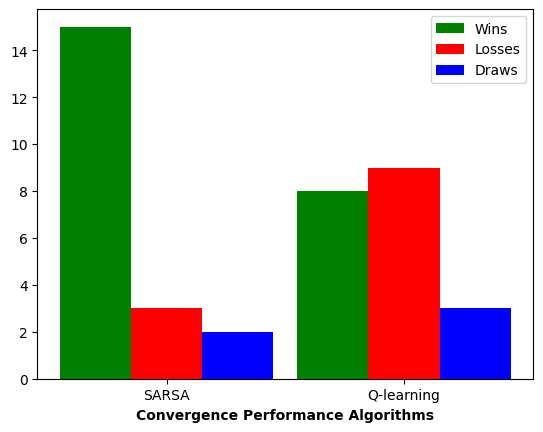

Board Size: 3x3
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Game 1
SARSA Result: Loss, SARSA Reward: -1
Custom Q-learning Result: Win, Custom Q-learning Reward: 1
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Game 2
SARSA Result: Loss, SARSA Reward: -1
Custom Q-learning Result: Win, Custom Q-learning Reward: 1
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Game 3
SARSA Result: Win, SARSA Reward: 1
Custom Q-learning Result: Win, Custom Q-learning Reward: 1
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Game 4
SARSA Result: Win, SARSA Reward: 1
Custom Q-learning Result: Draw, Custom Q-learning Reward: 0
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Game 5
SARSA Result: Win, SARSA Reward: 1
Custom Q-learning Result: Win, Custom Q-learning Reward: 1
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Bot moves
Game

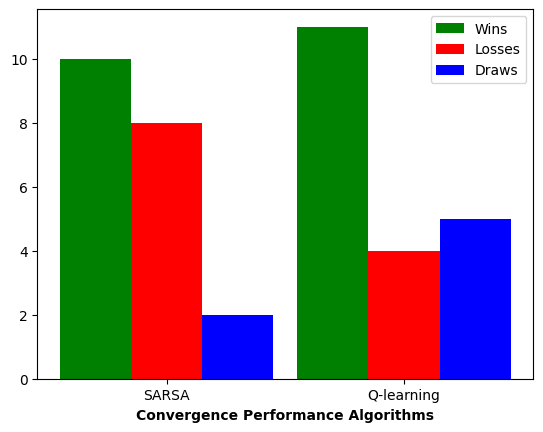

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Plays using algorithms and returns the result and reward of the game.
def play_game(algorithm, board_size):
    board = Board(board_size)
    game_play = Game(board)
    bot = BotPlayer('X', algorithm)
    while not game_play.chk_for_win('O') and not game_play.chk_for_win('X') and not game_play.chk_for_draw():
        bot_move = bot.get_move(board)
        board.insert_letter('X', bot_move)
        if game_play.chk_for_win('X'):
            reward = 1  # Reward for winning
            break
        elif game_play.chk_for_draw():
            reward = 0  # Reward for a draw
            break
        player_move = random.choice([k for k, v in board.get_board_state().items() if v == ' '])
        board.insert_letter('O', player_move)
        if game_play.chk_for_win('O'):
            reward = -1  # Reward for losing
            break
    else:
        # Game ended without a win or draw
        reward = -0.1  # Penalty for continuing the game

    result = 'Win' if reward == 1 else 'Loss' if reward == -1 else 'Draw'
    return result, reward


# Checking the win and draw conditions and finding the reward
class Game(AbstractGame):
  def __init__(self, board_data):
    super().__init__(board_data)

  # Check for Win
  def chk_for_win(self, letter):
    board_state = self.board_data.get_board_state()
    size = self.board_data.get_board_size()
    for row in range(size): # Check rows
        if all(board_state[row * size + col + 1] == letter for col in range(size)):
            return True

    for col in range(size): # Check columns
        if all(board_state[row * size + col + 1] == letter for row in range(size)):
            return True

    if all(board_state[i * size + i + 1] == letter for i in range(size)): # Check diagonals
        return True

    if all(board_state[i * size + size - i] == letter for i in range(size)):
        return True
    return False

  # Check for Draw
  def chk_for_draw(self):
    board_state = self.board_data.get_board_state()
    for key, value in board_state.items(): # Calling tuple unpack to access keys/ values
        if value == ' ':
            return False
    return True

  def reward_function(self, winner):
    if winner == 'X':
        return 1
    elif winner == 'O':
        return -1
    else:
        return 0

# Additional Q-Learning that uses a specific Q-value update rule
class CustomQLearning(QLearning):
    def __init__(self, alpha, epsilon, gamma):
        super().__init__(alpha, epsilon, gamma)

    # Custom Q-value update rule
    # Uses weighted average of the old Q-value and the maximum Q-value of the next state
    def update_q_value(self, state, action, reward, next_state):
        # Qvalue rule - use a weighted average update
        old_q_value = self.get_q_value(state, action)
        max_next_q_value = max(self.q_table[next_state].values())
        new_q_value = (1 - self.alpha) * old_q_value + self.alpha * (reward + self.gamma * max_next_q_value)
        self.set_q_value(state, action, new_q_value)

# Compares the performance of conventional SARSA and Q-Learning algorithms
def compare_algorithms(board_size, num_games=20):
    print(f'Board Size: {board_size}x{board_size}')
    sarsa_results = []
    qlearning_results = []

    for i in range(num_games):
        sarsa = Sarsa(alpha=0.5, epsilon=0.1, gamma=1.0)
        qlearning = QLearning(alpha=0.5, epsilon=0.1, gamma=1.0)
        sarsa_result, sarsa_reward = play_game(sarsa, board_size)
        qlearning_result, qlearning_reward = play_game(qlearning, board_size)
        sarsa_results.append(sarsa_result)
        qlearning_results.append(qlearning_result)
        print(f'Game {i + 1}')
        print(f'SARSA Result: {sarsa_result}, SARSA Reward: {sarsa_reward}')
        print(f'Q-learning Result: {qlearning_result}, Q-learning Reward: {qlearning_reward}')

    return sarsa_results, qlearning_results

# Compares the performance of a custom variant of Q-Learning and SARSA
def compare_algorithm_with_custom_rule(board_size, num_games=20, alpha=0.5):
    print(f'Board Size: {board_size}x{board_size}')
    sarsa_results = []
    custom_qlearning_results = []

    for i in range(num_games):
        sarsa = Sarsa(alpha=alpha, epsilon=0.1, gamma=1.0)
        custom_qlearning = CustomQLearning(alpha=alpha, epsilon=0.1, gamma=1.0)

        sarsa_result, sarsa_reward = play_game(sarsa, board_size)
        custom_qlearning_result, custom_qlearning_reward = play_game(custom_qlearning, board_size)

        sarsa_results.append(sarsa_result)
        custom_qlearning_results.append(custom_qlearning_result)

        print(f'Game {i + 1}')
        print(f'SARSA Result: {sarsa_result}, SARSA Reward: {sarsa_reward}')
        print(f'Custom Q-learning Result: {custom_qlearning_result}, Custom Q-learning Reward: {custom_qlearning_reward}')

    return sarsa_results, custom_qlearning_results


# Plots the results of comparing two algorithms
def plot_results(sarsa_results, qlearning_results):
    algorithms = ['SARSA', 'Q-learning']
    wins = [sarsa_results.count('Win'), qlearning_results.count('Win')]
    losses = [sarsa_results.count('Loss'), qlearning_results.count('Loss')]
    draws = [sarsa_results.count('Draw'), qlearning_results.count('Draw')]

    bar_width = 0.3
    r1 = np.arange(len(algorithms))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    plt.bar(r1, wins, color='green', width=bar_width, label='Wins')
    plt.bar(r2, losses, color='red', width=bar_width, label='Losses')
    plt.bar(r3, draws, color='blue', width=bar_width, label='Draws')

    plt.xlabel('Convergence Performance Algorithms', fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms)
    plt.legend()
    plt.show()

# Board size 3x3
sarsa_results, qlearning_results = compare_algorithms(3)
plot_results(sarsa_results, qlearning_results)

# Board size 3x3, Q-value updated rule - different alpha value
custom_alpha = 0.3
sarsa_results, custom_qlearning_results = compare_algorithm_with_custom_rule(3, alpha=custom_alpha)
plot_results(sarsa_results, custom_qlearning_results)

# To make your solution efficient, you are expected to code Monte-Carlo Tree Search algorithm and integrate it with Q-Learning algorithm previously coded.

### MCTS
*MCTS combines the standards of Monte Carlo strategies, which rely upon random sampling and statistical evaluation, with tree-primarily based search techniques *[9].

Basically, the Monte Carlo Tree Search Algorithm (MCTS) with Q learning is used to make the bot choose more intelligent moves. <br>
<br>
- The MCTS is a heuristic based search algorithm used for games when the state space is too large, it constructs a search tree of possible moves, principles of RL [9] and an iteration selecting the highest upper confidence bound (UCB) [10].
- This is a heuristic measure and expansion, if the node is unexplored, it will add it to the tree and select a random move to play from that node. It uses simulation to play out the game using random moves until the end of game is reached (reward).
- The backpropagation is the nodes information on the path selected from root to outcome of simulation. The MCTS algorithm repeats many times finding the best move.

### Q-learning algorithm has issues with large state/ action spaces,
- It can’t explore all possible actions for each state and store or these Q-values in a Q table
- It doesn’t use a tree structure and can miss opportunities as it can’t explore the state space
- It normally only finds one solution and can miss better ones. <br>
<br>

By merging MCTS with Q-learning to update the value of edges in the Monte Carlo search tree generated by the MCTS algorithm it can update the Q table during each episode.
- This means that it can simulate the outcome of many games and use this information to find better solutions rather than a brute force approach which would be to costly (time/ memory). <br>
<br>

1. I created a Q-learning method that takes a state, an action, a reward, and the next state as inputs/ this updates the Q-values in the dictionary.
2. I use the Q-values to choose actions in the simulation instead of randomly selecting them (MCTS).
3. Additionally, I created a method for backpropagation (MCTS), I use the Q-values to update the node values instead of a reward. <br>
<br>

I had to create additional Board, AbstractGame and Game classes as I wanted to test this new algorithm against the other algorithms, I had designed in the task rather than just playing the algorithm like before. The MonteCarloNote is the node class which provides methods for updating node statistics and tree traversal. The MontreCarloTreeSearch is the main algorithm and the MCS_Q_Learning is used for the Monte Carlo algorithm in the MCTS.


In [27]:
import math
# Concrete class for the board
class Board(AbstractBoard):
    def __init__(self, board_size, board_data=None):
        self.board_size = board_size
        if board_data is not None:
            self.board_data = board_data
        else:
            self.board_data = {i: ' ' for i in range(1, board_size * board_size + 1)}

    def set_board(self, placement, state):
        self.board_data[placement] = state

    def get_board_state(self):
        return self.board_data

    def get_board_size(self):
        return self.board_size

    def is_full(self):
        return all(val != ' ' for val in self.board_data.values())

    def print_board(self):
        for row in range(self.board_size):
            for col in range(self.board_size):
                position = row * self.board_size + col + 1
                print(self.board_data[position], end='')
                if col < self.board_size - 1:
                    print('|', end='')
            print()
            if row < self.board_size - 1:
                print('-' * (self.board_size * 2 - 1))

    def space_is_free(self, position):
        return self.board_data[position] == ' '

    def reset_board(self):
        self.board_data = {i: ' ' for i in range(1, self.board_size * self.board_size + 1)}

    def get_valid_moves(self):
        return [k for k, v in self.board_data.items() if v == ' ']

    def insert_letter(self, letter, position):
        self.board_data[position] = letter

class AbstractGame():
    def __init__(self, board):
        self.board = board

    @abstractmethod
    def chk_for_win(self):
        pass

    @abstractmethod
    def chk_for_draw(self):
        pass

class Game(AbstractGame):
    def __init__(self, board_data):
        # Create a new instance of the Board class using the board_data dictionary
        self.board = Board(int(math.sqrt(len(board_data))), board_data)
        super().__init__(self.board)

    # Check for Win
    def chk_for_win(self, letter):
        board_state = self.board.get_board_state()
        size = self.board.get_board_size()
        for row in range(size): # Check rows
            if all(board_state[row * size + col + 1] == letter for col in range(size)):
                return True

        for col in range(size): # Check columns
            if all(board_state[row * size + col + 1] == letter for row in range(size)):
                return True

        if all(board_state[i * size + i + 1] == letter for i in range(size)): # Check diagonals
            return True

        if all(board_state[i * size + size - i] == letter for i in range(size)):
            return True
        return False

    # Check for Draw
    def chk_for_draw(self):
        board_state = self.board.get_board_state()
        for key, value in board_state.items():
            if value == ' ':
                return False
        return True

def game_over(board):
    game = Game(board.get_board_state())
    return game.chk_for_win('X') or game.chk_for_win('O') or game.chk_for_draw()

# Specifically for bot player to determine next move in game
# Overrides the get_move() method
class MonteCarloPlayer(AbstractPlayer):
    def __init__(self, letter, algorithm, board):
        super().__init__(letter, algorithm)
        self.board = board

    def get_move(self):
        placement = self.algorithm.comp_move(self.letter)
        self.board.insert_letter(self.letter, placement)


class BotPlayer(AbstractPlayer):
    def __init__(self, letter, algorithm):
        super().__init__(letter, algorithm)

    def get_move(self, board):
        placement = self.algorithm.comp_move(board.get_board_state(), self.letter)
        board.insert_letter(self.letter, placement)

# Define the Monte Carlo Tree Search algorithm
# Algorithm simulates games with random moves from node
class MonteCarloNode():
    # Each MonteCarloNode instance is responsible for holding a board state, a link to its parent node, and its own list of child nodes.
    def __init__(self, current_state, letter=None, parent=None):
        self.parent = parent
        self.children = {}  # List to hold child nodes

        # Track of the number of visits and total reward for this node
        self.visits = 0
        self.wins = 0
        self.untried_actions = current_state.get_valid_moves()
        self.current_state = current_state
        self.letter = letter

    # Add a new child node to the current node with a given action and state
    def add_child(self, action):
        next_state = self.current_state
        next_state.set_board(action, self.letter)
        next_letter = 'O' if self.letter == 'X' else 'X'
        child = MonteCarloNode(current_state=next_state, letter=next_letter, parent=self)
        self.untried_actions.remove(action)
        self.children[action] = child
        return child

    def is_leaf_node(self):
        return len(self.children) == 0

    def is_fully_expanded(self):
        return len(self.untried_actions) == 0

    def is_terminal_node(self):
        return self.current_state.is_full()

    # Update the total reward and number of visits for this node based on the reward from the simulation
    def update(self, reward):
        self.visits += 1
        self.wins += reward

# Simulates games with random moves from node in tree
# Uses tree data structure to store board states and outcomes when visited
# Each simulation explores a full game and uses backpropagation of the reward, updating nodes win/ visit count
class MonteCarloTreeSearch():
    def __init__(self, game, c=1.41):
        self.game = game
        self.c = c

    def selection(self, node):
        while not node.is_leaf_node():
            ucb_values = [self.ucb(node, child) for child in node.children.values()]
            node = node.children.values()[ucb_values.index(max(ucb_values))]
        return node

    def expansion(self, node):
        action = random.choice(node.untried_actions)
        next_node = node.add_child(action)
        return next_node

    def simulation(self, node):
        current_state = node.current_state
        letter = 'O' if node.letter == 'X' else 'X'
        while not game_over(self.game):
            possible_moves = current_state.get_valid_moves()
            move = random.choice(possible_moves)
            current_state.insert_letter(letter, move)
            letter = 'O' if letter == 'X' else 'X'
        # Reward 1 if the node's letter wins, 0 otherwise
        reward = 1 if self.game.chk_for_win(node.letter) else 0
        return reward


    # Backpropagation of the reward occurs from the leaf node to the root node through the tree updating each node's win and visit count
    def backpropagation(self, node, reward):
        while node is not None:
            node.update(reward)
            node = node.parent

    # Compute the upper confidence bound (UCB) value for the child node using the given constant c
    def ucb(self, parent, child):
        if child.visits == 0:
            return float('inf')
        return child.wins / child.visits + self.c * math.sqrt(math.log(parent.visits) / child.visits)

    def run_simulation(self, root):
        node = root
        while not node.is_terminal_node():
            if not node.is_fully_expanded():
                # Expand the selected node
                node = self.expansion(node)
                break
            else:
                node = self.selection(node)
        reward = self.simulation(node)
        self.backpropagation(node, reward)

    def get_best_move(self, root):
        return max(root.children.items(), key=lambda kvp: kvp[1].visits)[0]

# Q-Learning-based Monte Carlo Simulation
# Implements both algorithms uses Monte Carlo search to find best move and updating Q table
class MCS_Q_Learning(Algorithm):
    def __init__(self, game, iters=100, c=1.41, alpha=0.5, epsilon=0.1, gamma=1.0):
        super().__init__(board_data=None)
        self.game = game
        self.iters = iters
        self.c = c
        self.alpha = alpha
        self.epsilon = epsilon
        self.gamma = gamma
        self.Q = {}

    # Uses Monte Carlo search to find best move
    def comp_move(self, letter):
        root = MonteCarloNode(self.game.board, letter)
        for i in range(self.iters):
            tree_search = MonteCarloTreeSearch(self.game, self.c)
            tree_search.run_simulation(root)
        return tree_search.get_best_move(root)

    # PLays game and updates results Q table
    def run_episode(self, letter):
        board = self.game.board
        state = tuple(board.get_board_state().items())
        episode = []
        while True:
            action = self.comp_move(letter)
            reward = self.game.reward_function(board.check_board_state(letter))
            board.insert_letter(letter, action)
            next_state = tuple(board.get_board_state().items())
            episode.append((state, action, reward))
            if board.check_board_state(letter) is not None:
                break
            letter = 'O' if letter == 'X' else 'X'
            QLearning.update_Q(self, state, action, reward, next_state)
            state = next_state
        return episode


# Concrete implementation of the game
class MonteCarloGame(AbstractGame):
    def __init__(self, board_size):
        self.board = Board(board_size, {i: ' ' for i in range(1, board_size * board_size + 1)})
        super().__init__(self.board)

    # Check for Win
    def chk_for_win(self, letter):
        board_state = self.board.get_board_state()
        size = self.board.get_board_size()
        for row in range(size): # Check rows
            if all(board_state[row * size + col + 1] == letter for col in range(size)):
                return True

        for col in range(size): # Check columns
            if all(board_state[row * size + col + 1] == letter for row in range(size)):
                return True

        if all(board_state[i * size + i + 1] == letter for i in range(size)): # Check diagonals
            return True

        if all(board_state[i * size + size - i] == letter for i in range(size)):
            return True
        return False

    # Check for Draw
    def chk_for_draw(self):
        board_state = self.board.get_board_state()
        for key, value in board_state.items():
            if value == ' ':
                return False
        return True

    def get_board_state(self):
        return self.board.get_board_state()

    def reward_function(self, result):
        if result == 'O':
            return -1
        elif result == 'X':
            return 1
        else:
            return 0


# Main function to test
def main():
    while True:
        # Game Set up
        board_size = int(input('Enter board size (3, 5, or 9): '))
        board_data = {i: ' ' for i in range(1, board_size * board_size + 1)}
        game_play = MonteCarloGame(board_size)
        print_board = game_play.board.print_board

        algorithm = None  # Initialize algorithm

        while True:  # Loop until user selects an algorithm
            algorithm_choice = input(
                "Select Algorithm for the game ('1' Minimax, '2' Monte-Carlo RL, '3' SARSA, '4' Q-learning, or 'random' random bot): ")
            if algorithm_choice == '1':
                algorithm = Minimax(board_data=game_play.board)
                break
            elif algorithm_choice == '2':
                algorithm = MonteCarloRL(epsilon=0.1, gamma=1.0)
                break
            elif algorithm_choice == '3':
                algorithm = Sarsa(alpha=0.5, epsilon=0.1, gamma=1.0)
                break
            elif algorithm_choice == '4':
                algorithm = QLearning(alpha=0.5, epsilon=0.1, gamma=1.0)
                break
            elif algorithm_choice == 'random':
                break
            else:
                print("Invalid choice. Please select again.")

        # Set MCS algorithm 1st player
        algorithm_MCS = MCS_Q_Learning(game_play, iters=100, c=1.41, alpha=0.5, epsilon=0.1, gamma=1.0)
        # Bot's first move
        if algorithm_choice != 'random':
            bot = MonteCarloPlayer('X', algorithm_MCS, game_play.board)
            bot.get_move()

        # Print board
        game_play.board.print_board()

        # 2nd Player
        player = BotPlayer('O', algorithm)

        while not game_play.chk_for_win('O') and not game_play.chk_for_win('X') and not game_over(game_play):
            player_move = player.get_move(game_play.board)  # Get move from 2nd player
            game_play.board.insert_letter('O', player_move)

            if game_play.chk_for_win('O') or game_over(game_play):
                break

            if algorithm_choice != 'random':
                bot.get_move()

            if game_play.chk_for_win('X') or game_over(game_play):
                break

            game_play.board.print_board()

        if game_play.chk_for_win('O'):
            print('You win!')
            # Print final board
            game_play.board.print_board()
        elif game_play.chk_for_win('X'):
            print('Bot wins!')
            # Print final board
            game_play.board.print_board()
        else:
            print('Draw!')
            # Print final board
            game_play.board.print_board()

        play_again = input('Do you want to play again? (y/n): ').lower()
        if play_again != 'y':
            break

main()

Enter board size (3, 5, or 9): 5
Select Algorithm for the game ('1' Minimax, '2' Monte-Carlo RL, '3' SARSA, '4' Q-learning, or 'random' random bot): 4
O|O|O|X|O
---------
O|X|X|O|X
---------
X|X|O|X|X
---------
X|O|O|X|X
---------
X|O|X|X|X
Draw!
O|O|O|X|O
---------
O|X|X|O|X
---------
X|X|O|X|X
---------
X|O|O|X|X
---------
X|O|X|X|X
Do you want to play again? (y/n): n
